In [1]:
import pandas as pd
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization
import seaborn as sns
%matplotlib inline

### Шаг 1

In [2]:
correct_path = 'B-C-D'

***Лог-файл процесса***

In [3]:
log = pd.read_csv('process_log.csv', parse_dates=['timestamp'])
cols = {'timestamp': 'time:timestamp', 'stage': 'concept:name', 'case': 'case:concept:name'}
log.rename(columns=cols, inplace=True)

In [4]:
log.dtypes

case:concept:name             int64
concept:name                 object
time:timestamp       datetime64[ns]
dtype: object

In [5]:
log.loc[100:104]

,case:concept:name,concept:name,time:timestamp
100,1000,C,2018-01-29 20:56:10
101,550,B,2018-01-30 14:27:45
102,752,D,2018-01-30 22:24:30
103,358,B,2018-01-31 17:48:08
104,919,C,2018-01-31 17:51:06


***Граф процесса***

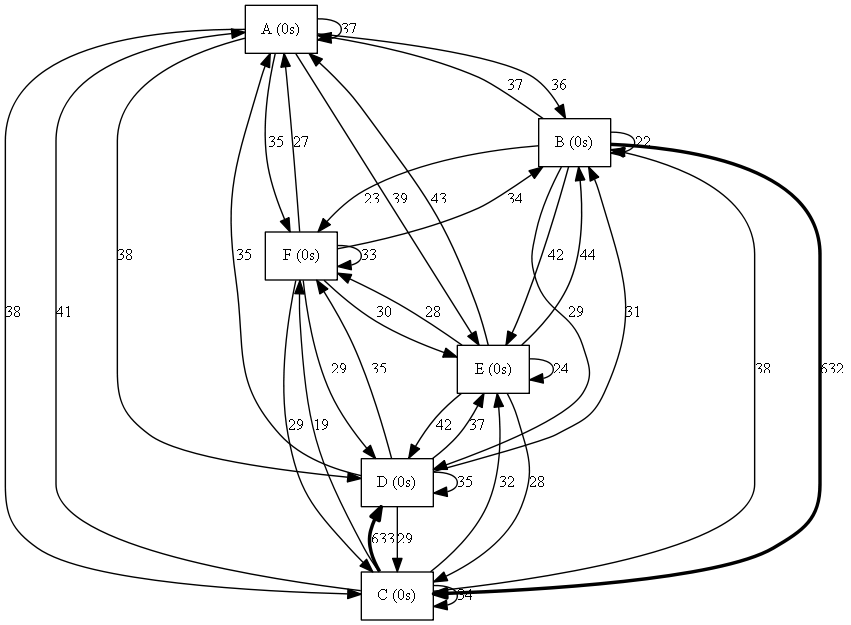

In [6]:
dfg = dfg_discovery.apply(log)
gviz = dfg_visualization.apply(dfg, log=log, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)

### Шаг 2

In [7]:
stages = log['concept:name'].unique().tolist()
cases = log['case:concept:name'].unique().tolist()

paths = {}
for case in cases:
    log_single = log[log['case:concept:name'] == case].sort_values(by='time:timestamp')
    path = '-'.join(log_single['concept:name'])
    paths[path] = paths.get(path, 0) + 1
    
data = [(k, v) for k, v in paths.items()]
results = pd.DataFrame(data, columns=['Путь', 'Количество'])

results['Соответствует'] = results['Путь'].apply(lambda path: 'Да' if path == correct_path else 'Нет')

In [8]:
results.head(5)

,Путь,Количество,Соответствует
0,B-C-D,600,Да
1,A-E-D-C-C,1,Нет
2,C-F-B,1,Нет
3,D-B-B,1,Нет
4,E-E-D,1,Нет


### Шаг 3

***Соответствие***

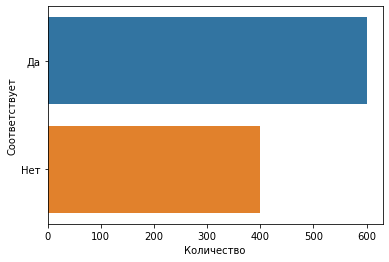

In [9]:
conformance = results.groupby('Соответствует')['Количество'].sum().reset_index()
sns.barplot(data=conformance, x='Количество', y='Соответствует')

***Top-5***

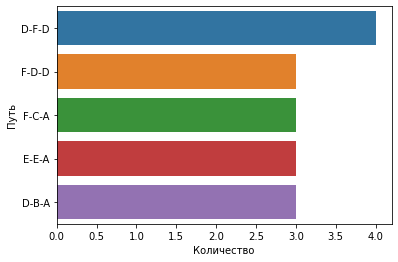

In [10]:
incorrect_all = results[results['Соответствует'] == 'Нет']
incorrect_top5 = incorrect_all.groupby('Путь').sum().sort_values(by='Количество', ascending=False).head(5).reset_index()
sns.barplot(data=incorrect_top5, x='Количество', y='Путь')

In [11]:
incorrect_top5

,Путь,Количество
0,D-F-D,4
1,F-D-D,3
2,F-C-A,3
3,E-E-A,3
4,D-B-A,3
